##5.1

In [ ]:
import pandas as pd
import math as m
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('TSLA.csv')
df['Date'] = pd.to_datetime(df['Date'])

dr=df['Close Price'].pct_change().fillna(0).mean()
dsr=df['Close Price'].pct_change().fillna(0).std()
ar=dr*252
asr=dsr*m.sqrt(252)

print('Mean Daily Return: ',dr)
print('Daily Standard Deviation: ',dsr)
print('Annual Mean: ',ar)
print('Annual Standard Deviation: ',asr)

Mean Daily Return:  0.0007298232034346197
Daily Standard Deviation:  0.033607824959498205
Annual Mean:  0.18391544726552417
Annual Standard Deviation:  0.5335076816917299


##5.2

In [ ]:
df=pd.DataFrame()
df_a=pd.read_csv('ASHOKA.csv')
df['ASHOKA']=df_a['Close Price']
df_b=pd.read_csv('BAJAJELEC.csv')
df['BAJAJ']=df_b['Close Price']
df_c=pd.read_csv('BOMDYEING.csv')
df['BD']=df_c['Close Price']
df_d=pd.read_csv('CENTURYPLY.csv')
df['CY']=df_d['Close Price']
df_e=pd.read_csv('FORTIS.csv')
df['FS']=df_e['Close Price']

print(df.head())

   ASHOKA   BAJAJ     BD      CY      FS
0  216.05  341.15  82.20  266.65  205.25
1  214.90  347.00  83.40  266.10  207.90
2  217.00  349.85  82.25  264.85  205.90
3  209.65  334.10  78.95  260.35  196.85
4  206.25  336.20  77.15  254.05  203.55


In [ ]:
daily_mean = df.pct_change().mean()
cov_matrix = df.pct_change().dropna().cov()
weights = np.asarray([0.2,0.2,0.2,0.2,0.2])
portfolio_return = round(np.sum(daily_mean * weights) * 252,2)
portfolio_std = round(np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252),2)
print('Portfolio Annual Return: ', portfolio_return)
print('Portfolio Volatility: ', portfolio_std)

Portfolio Annual Return:  0.02
Portfolio Volatility:  0.26


##5.3

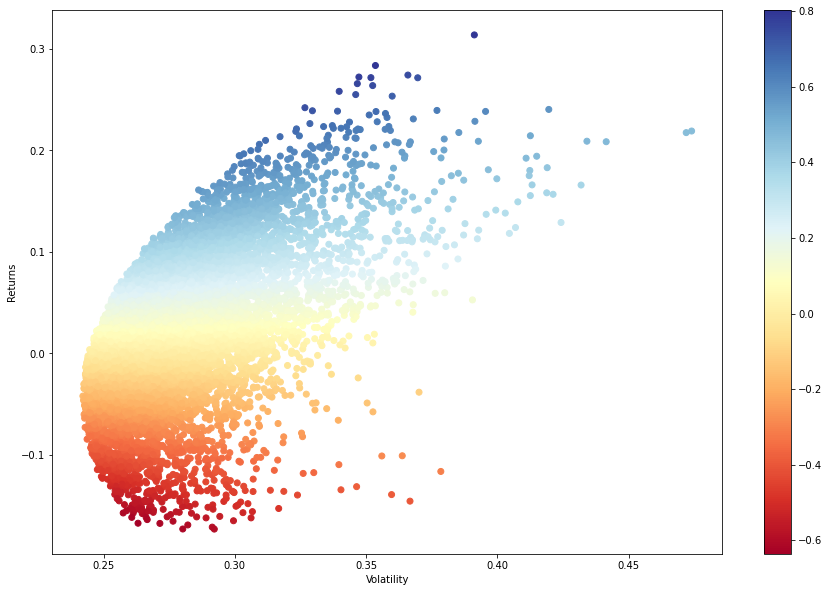

In [ ]:
daily_mean = df.pct_change().mean()
cov_matrix = df.pct_change().cov()
n = 10000
result = np.zeros((3, n))
for i in range(n):  
    weights = np.random.random(5)
    weights /= np.sum(weights)
    portfolio_return = np.sum(daily_mean * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    result[0,i] = portfolio_return
    result[1,i] = portfolio_std
    result[2,i] = result[0,i] / result[1,i]
result_frame = pd.DataFrame(result.T,columns=['Return','STD','Sharpe'])
plt.figure(figsize=(15,10))
plt.scatter(result_frame.STD,result_frame.Return,c=result_frame.Sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()

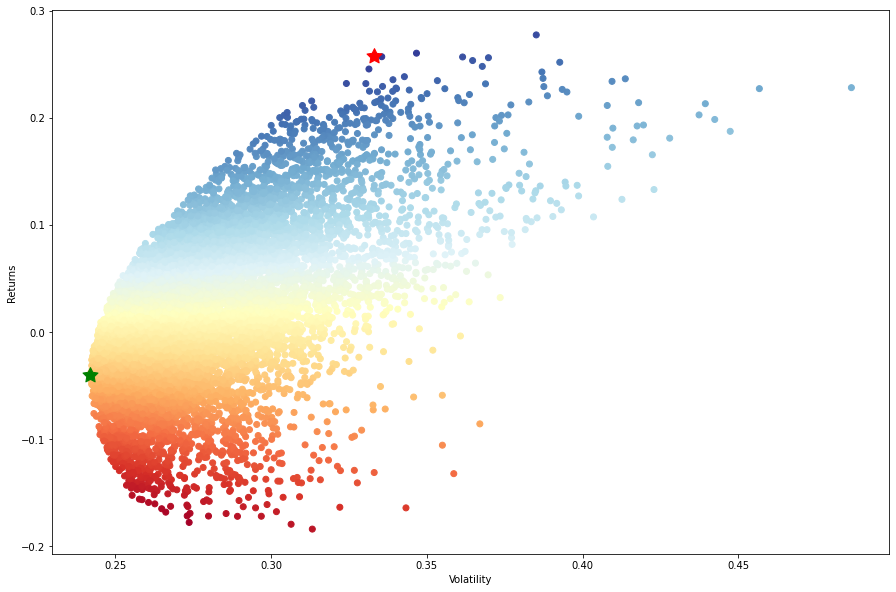

In [ ]:
plt.figure(figsize=(15,10))
max_sharpe_port = result_frame.iloc[result_frame['Sharpe'].idxmax()]
min_vol_port = result_frame.iloc[result_frame['STD'].idxmin()]
plt.scatter(result_frame.STD,result_frame.Return,c=result_frame.Sharpe,cmap='RdYlBu');
plt.xlabel('Volatility');
plt.ylabel('Returns');
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=250);
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=250);
